# Rock-Scissor-Paper CNN ver.2

👉 금요일 정신없이 제출한 내용을 다시 천천히 정리하면서 진행한 `최종 버전`입니다.

---

## 데이터 로드
- 내 데이터를 포함해 아이펠 온라인 7기 코어 그루의 공유한 이미지 데이터 중 11종 사용


In [1]:
# 필요 라이브러리 불러오기
from PIL import Image
import glob
import os

### 데이터 전처리 1) 이미지 리사이즈
- 원본 사이즈 224x224 -> 56x56 로 변경

In [2]:
# 리사이징 함수
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
    target_size=(56,56)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.Resampling.LANCZOS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [3]:
# 리사이징할 이미지 경로들 - 내 이미지와 그루들 이미지
paths = ["/rock_scissor_paper", "/add_data_1","/add_data_2","/add_data_3","/add_data_4",
         "/add_data_5","/add_data_6","/add_data_7", "/add_data_8", "/add_data_9", "/add_data_10"]

# 경로로 리사이징 함수 호출하는 함수
def resize_with_path(paths):
    for path in paths:
        image_dir_path_s = os.getenv("QUEST_DATA") + path + "/scissor"
        image_dir_path_r = os.getenv("QUEST_DATA") + path + "/rock"
        image_dir_path_p = os.getenv("QUEST_DATA") + path + "/paper"
        resize_images(image_dir_path_s)
        resize_images(image_dir_path_r)
        resize_images(image_dir_path_p)

resize_with_path(paths)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
103  images to be resized.
103  images resized.
100  images to be resized.
100  images resized.
101  images to be resized.
101  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
0  images to be resized.
0  images resized.
0  images to be resized.
0  images resized.
0  images to be resized.
0  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100 

In [4]:
# 폴더명 때문에 리사이징되지않은 두 폴더 다시 리사이징
# 리사이징할 이미지 경로들 - 내 이미지와 그루들 이미지
paths = ["/add_data_5","/add_data_8"]

# 경로로 리사이징 함수 호출하는 함수
def resize_with_path(paths):
    for path in paths:
        image_dir_path_s = os.getenv("QUEST_DATA") + path + "/scissor"
        image_dir_path_r = os.getenv("QUEST_DATA") + path + "/rock"
        image_dir_path_p = os.getenv("QUEST_DATA") + path + "/paper"
        resize_images(image_dir_path_s)
        resize_images(image_dir_path_r)
        resize_images(image_dir_path_p)

resize_with_path(paths)

9  images to be resized.
9  images resized.
20  images to be resized.
20  images resized.
4  images to be resized.
4  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


### 데이터 전처리 2) 이미지 값 정규화

- 이미지 픽셀값 0-255을 0~1 사이 값으로 정규화를 진행한다
- 전체 데이터를 학습할수 있는 데이터 형태로 변경하는 함수 load_data()를 사용
  - 각 이미지를 numpy행렬로 변환후 image의 라벨(0~1)을 지정
    - 0 : 가위
    - 1 : 바위
    - 2 : 보
  - 각 image와 해당 라벨이 동일한 인덱스를 가진 데이터로 반환 

In [5]:
import numpy as np

# 학습데이터로 변경하는 함수
def load_data(img_path, number_of_data=300):  # 폴더별로 이미지 개수가 달라서 이미지 개수로 지정
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [9]:
paths = ["/rock_scissor_paper", "/add_data_1","/add_data_2","/add_data_3","/add_data_4",
         "/add_data_5","/add_data_6","/add_data_7", "/add_data_8", "/add_data_9", "/add_data_10"]
dirs = ['/rock','/scissor','/paper']

# 이미지 데이터화 함수
def image2data(paths, dirs):
    # 전체 데이터 담을 빈 array
    total_x_train = np.array([], dtype=np.int32).reshape(0, 56, 56, 3)
    total_y_train = np.array([], dtype=np.int32)
    
    for i, path in enumerate(paths):
        image_dir_path = os.getenv("QUEST_DATA") + path
        number_of_data = 0
        # 각 폴더별 이미지 개수 확인
        for dir in dirs:
            number_of_data += len([f for f in os.listdir(image_dir_path + dir) if f.endswith(".jpg")])
    
        # 총 데이터 개수 확인
        print(path, "폴더의 총 데이터 개수:", number_of_data)
        
        # 학습데이터 형식으로 변환
        (x_train_i, y_train_i) = load_data(image_dir_path, number_of_data)
        
        # 이미지 합치기 - concatenate
        total_x_train = np.concatenate((total_x_train, x_train_i), axis=0)
        total_y_train = np.concatenate((total_y_train, y_train_i), axis=0)

    return total_x_train, total_y_train


total_x_train, total_y_train = image2data(paths, dirs)
print(f"x train shape:{total_x_train.shape} / y train shape:{total_y_train.shape}")

/rock_scissor_paper 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_1 폴더의 총 데이터 개수: 304
학습데이터(x_train)의 이미지 개수는 304 입니다.
/add_data_2 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_3 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_4 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_5 폴더의 총 데이터 개수: 33
학습데이터(x_train)의 이미지 개수는 33 입니다.
/add_data_6 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_7 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_8 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_9 폴더의 총 데이터 개수: 753
학습데이터(x_train)의 이미지 개수는 753 입니다.
/add_data_10 폴더의 총 데이터 개수: 331
학습데이터(x_train)의 이미지 개수는 331 입니다.
x train shape:(3521, 56, 56, 3) / y train shape:(3521,)


In [10]:
# 값 정규화
x_train_norm = total_x_train / 255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(total_x_train.shape))
print("y_train shape: {}".format(total_y_train.shape))

x_train shape: (3521, 56, 56, 3)
y_train shape: (3521,)


라벨:  0


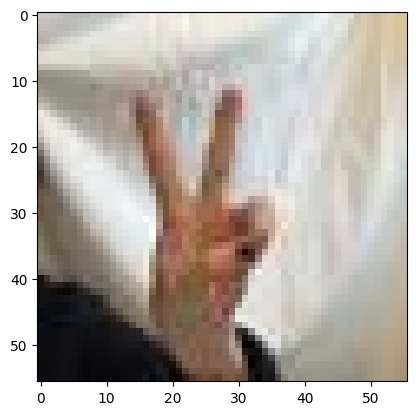

라벨:  1


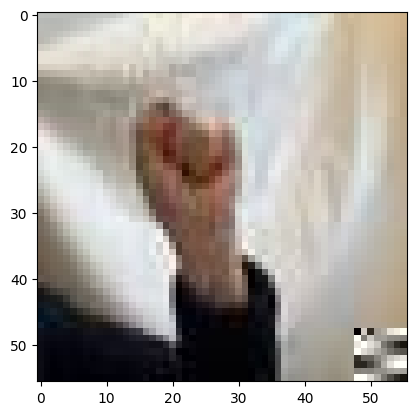

라벨:  2


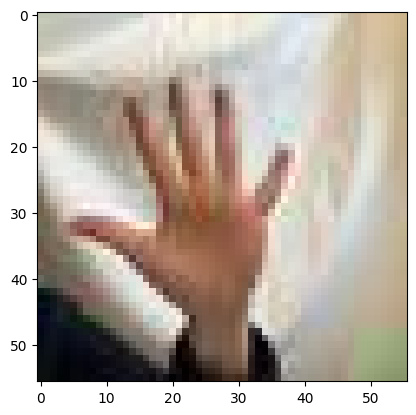

In [11]:
# 각 라벨 값의 사진 1개씩 임의 출력
import matplotlib.pyplot as plt

for i in range(0, 3):
    index = np.argwhere(total_y_train == i)
    img = total_x_train[index][0][0].reshape(56, 56, 3)
    plt.imshow(img)
    print('라벨: ', total_y_train[index][0][0])
    plt.show()

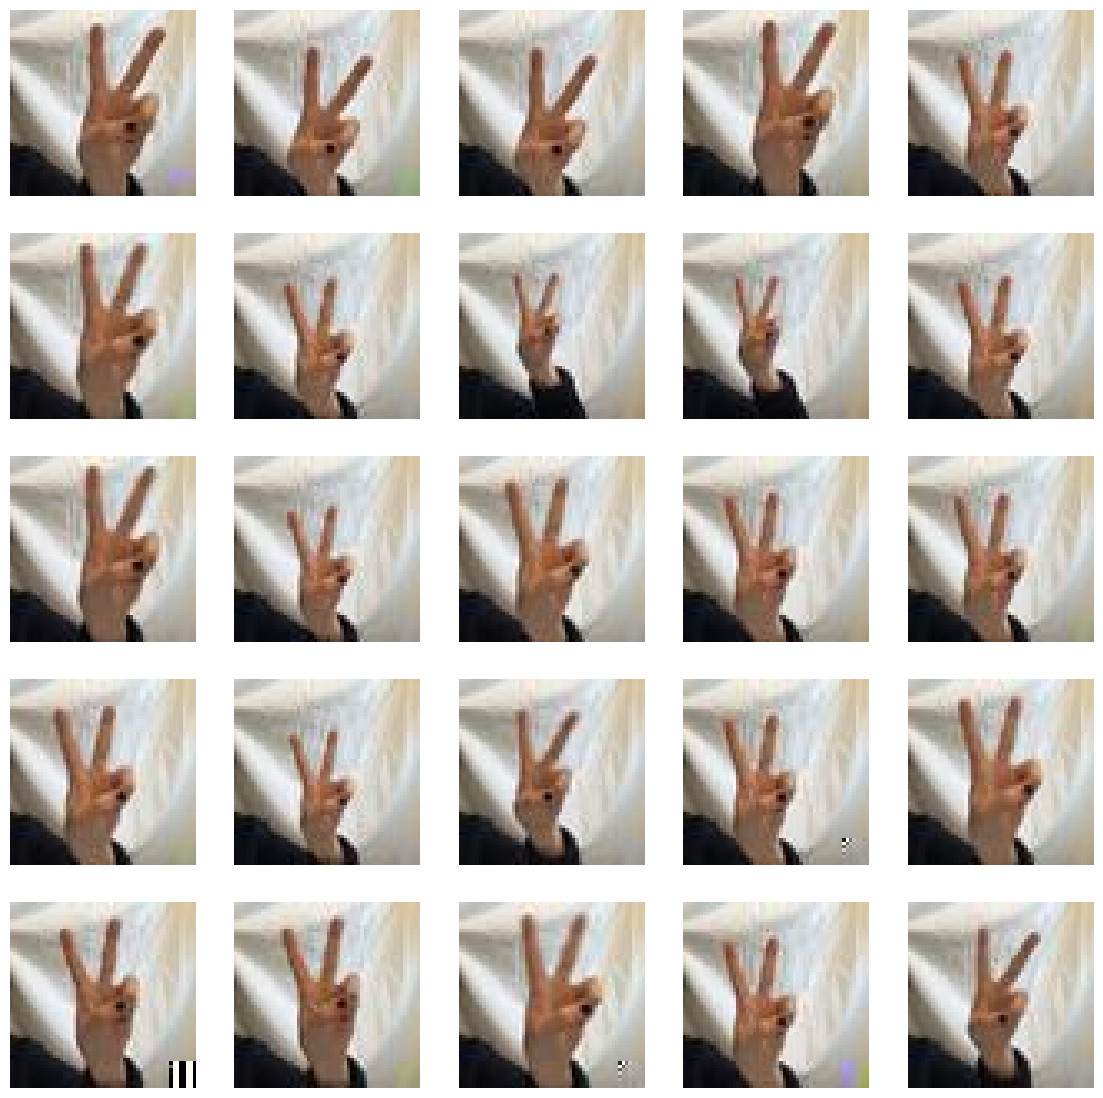

In [12]:
# 훈련데이터 확인
plt.figure(figsize=(14, 14))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(x_train_norm[i], 'gray')
    plt.axis('off')
plt.show()

- 위에서 작업한 폴더 이미지 순서대로 저장되어있는걸 확인할수 있다.
- 데이터를 분리할때 랜덤으로 섞여서 분리될수 있도록 한다.

---
## 데이터 분리
- train, test data 2개로 분리
- 지금 데이터는 폴더별, 라벨순으로 저장되어있기때문에 적절하게 라벨이 섞일수 있도록 shuffle 을 true로 둔다
- train 데이터는 추후에 keras의 model.fit()에서 validation_split을 적용해서 검증데이터로 분리해서 학습할 예정

In [17]:
# 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_norm, total_y_train,
                                                    test_size=0.2, random_state=42, shuffle=True)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2816, 56, 56, 3) (705, 56, 56, 3) (2816,) (705,)


- 이미지 적절하게 섞여있는지 확인

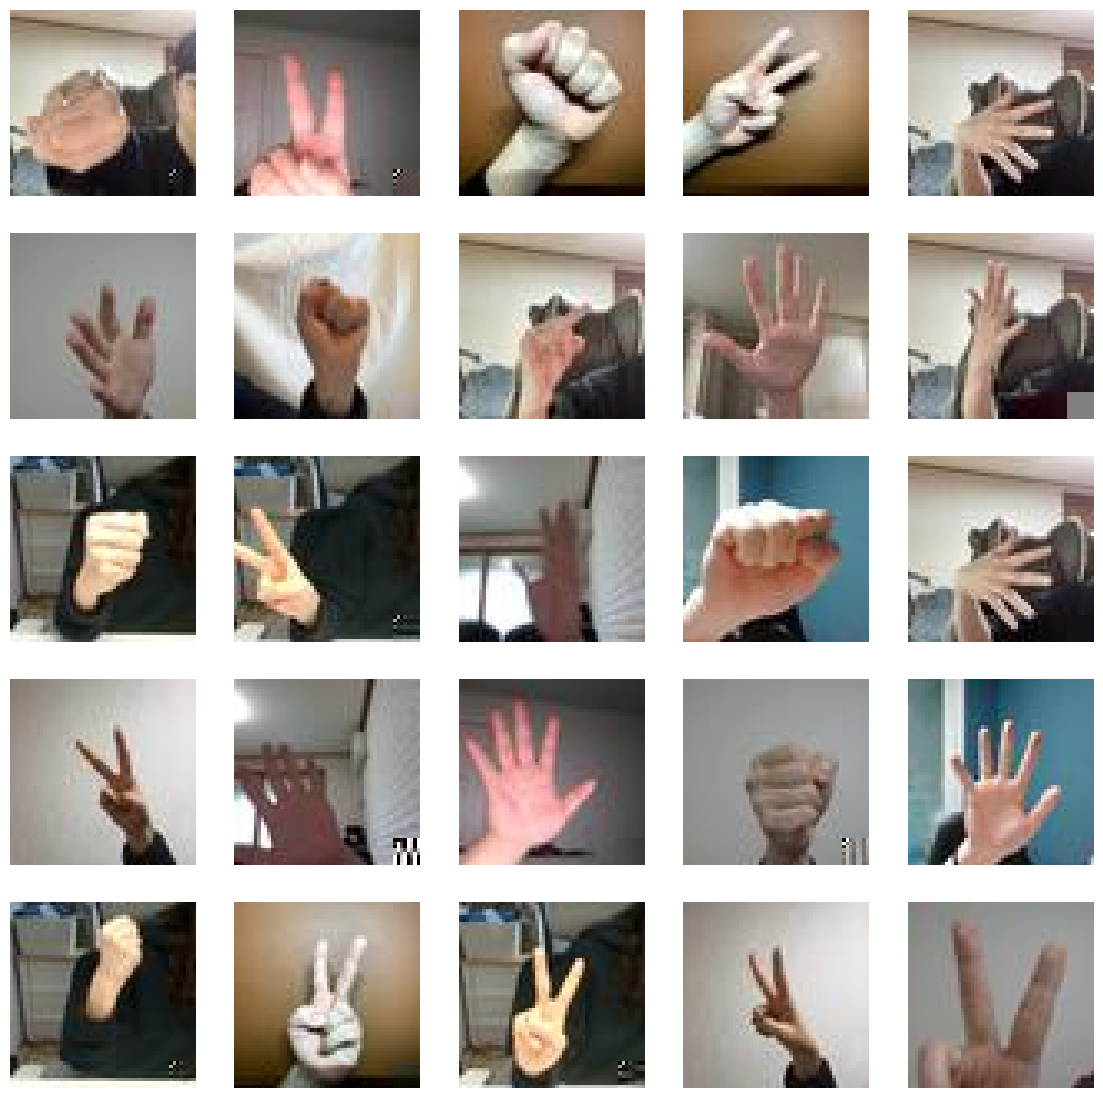

In [18]:
# 데이터셋 출력
plt.figure(figsize=(14, 14))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(x_train[i], 'gray')
    plt.axis('off')
plt.show()

- 각 이미지와 라벨이 적절하게 섞여 있다!

---

## 모델 학습
- 배치정규화, 드롭아웃, 가중치 초기화 등의 추가 설정없이 훈련후 정확도 그래프를 확인하고 맞춰서 모델을 수정해볼 예정
    
[참고] `categorical_crossentropy` / `sparse_categorical_crossentropy` 차이점   
일반적으로 다중클래스 분류때 손실함수로 `categorical_crossentropy`를 사용하는데, `sparse_categorical_crossentropy`를 사용할 예정  
둘의 차이점은 아래와 같다.
- 훈련데이터의 label(y / target) 값이 **원-핫 벡터** 형태인 경우,
    - `categorical_crossentropy` 사용하고
- 훈련 데이터의 label(y / target) 값이 **정수(Int)** 형태인 경우,
    - `sparse_categorical_crossentropy` 사용

> 어떤 함수를 사용하더라도 다중클래스 정확도에는 영향이 없다고 한다. sparse_categorical_crossentropy의 경우 one-hot-encoding을 하지 않기 때문에 메모리 소요가 적다는 장점이 있기에 이를 사용한다    
[참고블로그 링크](https://arc.net/l/quote/nkmydkgm)

### CNN Model 1 - basic_cnn

In [19]:
# 필요 라이브러리 로드
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

In [20]:
# model 1
'''
input_shape : 추후 다른 cnn 모델에도 사용해보기위해 x_train shape에 맞게 feature값을 가져오도록 설정

convolution layer : 1개
    - filter 3x3 16개
activation function : relu
maxpooling : 1개
    - filter 2x2
final activation function : softmax
optimizer : adam
    - learning rate : 0.001
loss function : sparse categorical crossentropy
'''
def basic_cnn():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', 
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 16 neurons
    model.add(Dense(16, activation='relu'))
    # final layer with 3 neurons to classify the instances
    model.add(Dense(3, activation='softmax'))

    adam = optimizers.legacy.Adam(learning_rate = 0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [21]:
model = basic_cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 16)        448       
                                                                 
 activation (Activation)     (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 16)                200720    
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                        

2023-12-17 22:22:23.688335: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-17 22:22:23.688388: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-17 22:22:23.688395: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-17 22:22:23.688492: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-17 22:22:23.688708: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
# 모델 학습 후 학습 과정 시각화
history = model.fit(x_train, y_train, batch_size=50, validation_split=0.2, 
                    epochs=20, verbose=2) # verbose=2로 두면 에포크당 훈련 내용을 자세하게 볼수 있다

Epoch 1/20


2023-12-17 22:22:36.360923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


46/46 - 1s - loss: 1.1092 - accuracy: 0.4685 - val_loss: 0.8642 - val_accuracy: 0.6613 - 1s/epoch - 26ms/step
Epoch 2/20
46/46 - 0s - loss: 0.7209 - accuracy: 0.7167 - val_loss: 0.6202 - val_accuracy: 0.7429 - 370ms/epoch - 8ms/step
Epoch 3/20
46/46 - 0s - loss: 0.5053 - accuracy: 0.8512 - val_loss: 0.4721 - val_accuracy: 0.8209 - 399ms/epoch - 9ms/step
Epoch 4/20
46/46 - 0s - loss: 0.3491 - accuracy: 0.9094 - val_loss: 0.3830 - val_accuracy: 0.9007 - 384ms/epoch - 8ms/step
Epoch 5/20
46/46 - 0s - loss: 0.3657 - accuracy: 0.8632 - val_loss: 0.3936 - val_accuracy: 0.7979 - 343ms/epoch - 7ms/step
Epoch 6/20
46/46 - 0s - loss: 0.2846 - accuracy: 0.9396 - val_loss: 0.2844 - val_accuracy: 0.9486 - 368ms/epoch - 8ms/step
Epoch 7/20
46/46 - 0s - loss: 0.1965 - accuracy: 0.9707 - val_loss: 0.2064 - val_accuracy: 0.9681 - 401ms/epoch - 9ms/step
Epoch 8/20
46/46 - 0s - loss: 0.1638 - accuracy: 0.9711 - val_loss: 0.1784 - val_accuracy: 0.9734 - 399ms/epoch - 9ms/step
Epoch 9/20
46/46 - 0s - loss:

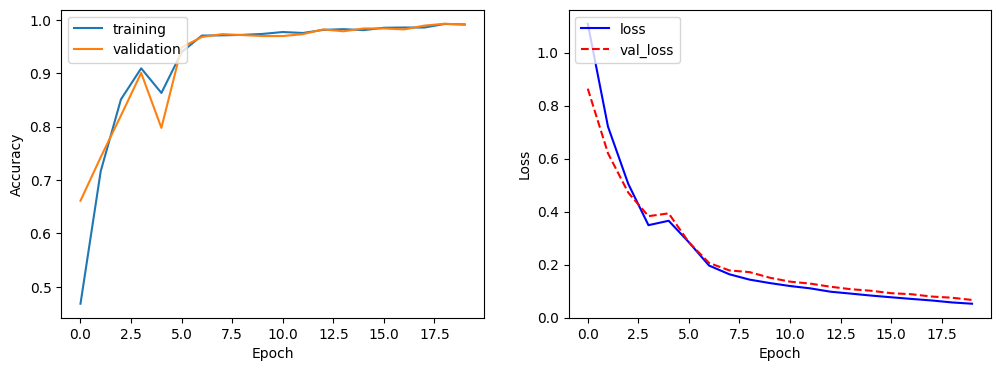

In [23]:
# 시각화 - 정확도 비교 / loss값 비교 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc = 'upper left')

plt.show()

- 정확도는 99%가 나온다. 데이터들이 다 비슷해서일지도 모르겠다.
- 에포크 4-5 즈음에서 훈련데이터와 검증데이터 정확도가 함께 떨어지는 모양이다.
- 모델을 조금 더 수정해서 다시 확인해봐야겠다.

---
### CNN model 2 - deep_cnn_1

In [24]:
# model 2
'''
input_shape : 추후 다른 cnn 모델에도 사용해보기위해 x_train shape에 맞게 feature값을 가져오도록 설정

convolution layer : 2개
    - filter 3x3 16개
    - filger 3x3 32개
activation function : relu
maxpooling : 2개
    - filter 2x2
    
final activation function : softmax
optimizer : adam
    - learning rate : 0.001
loss function : sparse categorical crossentropy
'''
def deep_cnn_1():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', 
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',  
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 32 neurons
    model.add(Dense(32, activation='relu'))
    # final layer with 3 neurons to classify the instances
    model.add(Dense(3, activation='softmax'))

    adam = optimizers.legacy.Adam(learning_rate = 0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [25]:
model = deep_cnn_1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 56, 56, 16)        448       
                                                                 
 activation_1 (Activation)   (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 activation_2 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                 

In [26]:
# 조기종료 세팅
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2, restore_best_weights=True)

# train
history = model.fit(x_train, y_train, batch_size=50, validation_split=0.2, epochs=20, callbacks=[early_stop], verbose=2) 

Epoch 1/20
46/46 - 1s - loss: 1.0326 - accuracy: 0.5093 - val_loss: 0.9388 - val_accuracy: 0.5355 - 962ms/epoch - 21ms/step
Epoch 2/20
46/46 - 0s - loss: 0.7642 - accuracy: 0.6843 - val_loss: 0.6654 - val_accuracy: 0.6826 - 463ms/epoch - 10ms/step
Epoch 3/20
46/46 - 0s - loss: 0.4683 - accuracy: 0.8410 - val_loss: 0.4184 - val_accuracy: 0.8777 - 462ms/epoch - 10ms/step
Epoch 4/20
46/46 - 0s - loss: 0.2846 - accuracy: 0.9312 - val_loss: 0.2516 - val_accuracy: 0.9149 - 443ms/epoch - 10ms/step
Epoch 5/20
46/46 - 0s - loss: 0.1836 - accuracy: 0.9569 - val_loss: 0.1979 - val_accuracy: 0.9379 - 449ms/epoch - 10ms/step
Epoch 6/20
46/46 - 0s - loss: 0.1325 - accuracy: 0.9654 - val_loss: 0.1545 - val_accuracy: 0.9539 - 426ms/epoch - 9ms/step
Epoch 7/20
46/46 - 0s - loss: 0.0809 - accuracy: 0.9818 - val_loss: 0.1103 - val_accuracy: 0.9681 - 473ms/epoch - 10ms/step
Epoch 8/20
46/46 - 0s - loss: 0.0843 - accuracy: 0.9774 - val_loss: 0.0658 - val_accuracy: 0.9911 - 418ms/epoch - 9ms/step
Epoch 9/20

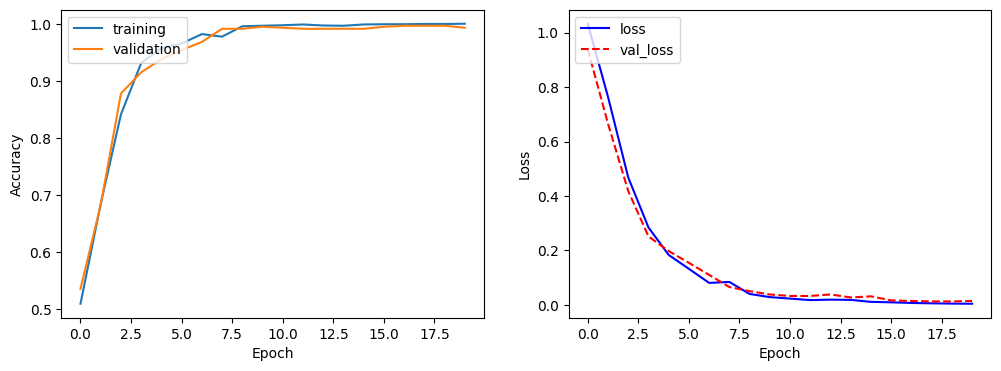

In [27]:
# 시각화 - 정확도 비교 / loss값 비교 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc = 'upper left')

plt.show()

- 교과서에서 보던 그래프가 나왔다..! 테스트셋으로 정확도를 확인해보자!

## Test accuracy 확인

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

23/23 - 1s - loss: 0.0157 - accuracy: 0.9943 - 832ms/epoch - 36ms/step
test_loss: 0.015679948031902313 
test_accuracy: 0.9943262934684753


- 와 99%가 나온다..! 혹시 모르니 새로운 데이터로 추가 테스트를 진행해본다!

In [30]:
# 새로운 데이터셋 생성
paths = ["/add_data_11"]

# 리사이즈 함수 호출
resize_with_path(paths)

# 이미지 데이터화 함수 호출
x_test, y_test = image2data(paths, dirs)

print(f"x test shape:{x_test.shape} / y test shape:{y_test.shape}")

# 값 정규화
x_test = x_test / 255.0   # 입력은 0~1 사이의 값으로 정규화


# 다시 test accuracy 확인
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

174  images to be resized.
174  images resized.
226  images to be resized.
226  images resized.
218  images to be resized.
218  images resized.
/add_data_11 폴더의 총 데이터 개수: 618
학습데이터(x_train)의 이미지 개수는 618 입니다.
x test shape:(618, 56, 56, 3) / y test shape:(618,)
20/20 - 0s - loss: 2.3953 - accuracy: 0.3398 - 216ms/epoch - 11ms/step
test_loss: 2.3952765464782715 
test_accuracy: 0.33980584144592285


- 훈련데이터셋에 너무 잘 훈련됬었나보다. 새로운 데이터셋에 33% 정확도가 나온다.
- 배치정규화, 드롭아웃 등의 과적합을 방지하는 옵션을 추가한 모델을 만들어봐야겠다.

---
## 추가 모델 디자인 - 과적합 대비 모델
- model.fit에서 validation_rate를 주는데, 검증용데이터셋을 따로 만들어두지 않고 진행하는거라 제대로 실행이 되지않는것같은 기분이 든다..
- 데이터셋을 나누는 작업부터 시작해서 다시 모델을 훈련해보려고한다.

In [36]:
paths = ["/rock_scissor_paper", "/add_data_1","/add_data_2","/add_data_3","/add_data_4",
         "/add_data_5","/add_data_6","/add_data_7", "/add_data_8", "/add_data_9", "/add_data_10", "/add_data_11"]
dirs = ['/rock','/scissor','/paper']

# 이미지 데이터화 함수
def image2data(paths, dirs):
    # 전체 데이터 담을 빈 array
    total_x_train = np.array([], dtype=np.int32).reshape(0, 56, 56, 3)
    total_y_train = np.array([], dtype=np.int32)
    
    for i, path in enumerate(paths):
        image_dir_path = os.getenv("QUEST_DATA") + path
        number_of_data = 0
        # 각 폴더별 이미지 개수 확인
        for dir in dirs:
            number_of_data += len([f for f in os.listdir(image_dir_path + dir) if f.endswith(".jpg")])
    
        # 총 데이터 개수 확인
        print(path, "폴더의 총 데이터 개수:", number_of_data)
        
        # 학습데이터 형식으로 변환
        (x_train_i, y_train_i) = load_data(image_dir_path, number_of_data)
        
        # 이미지 합치기 - concatenate
        total_x_train = np.concatenate((total_x_train, x_train_i), axis=0)
        total_y_train = np.concatenate((total_y_train, y_train_i), axis=0)

    return total_x_train, total_y_train


total_x_train, total_y_train = image2data(paths, dirs)

# 값 정규화
x_train_norm = total_x_train / 255.0   # 입력은 0~1 사이의 값으로 정규화

# 데이터셋 분리 1 - train / test (7:3)
x_train, x_test, y_train, y_test = train_test_split(x_train_norm, total_y_train,
                                                    test_size=0.3, random_state=42, shuffle=True)
# 데이터셋 분리 2 - train / validation (6:4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                    test_size=0.4, random_state=7, shuffle=True)

print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

/rock_scissor_paper 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_1 폴더의 총 데이터 개수: 304
학습데이터(x_train)의 이미지 개수는 304 입니다.
/add_data_2 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_3 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_4 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_5 폴더의 총 데이터 개수: 33
학습데이터(x_train)의 이미지 개수는 33 입니다.
/add_data_6 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_7 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_8 폴더의 총 데이터 개수: 300
학습데이터(x_train)의 이미지 개수는 300 입니다.
/add_data_9 폴더의 총 데이터 개수: 753
학습데이터(x_train)의 이미지 개수는 753 입니다.
/add_data_10 폴더의 총 데이터 개수: 331
학습데이터(x_train)의 이미지 개수는 331 입니다.
/add_data_11 폴더의 총 데이터 개수: 618
학습데이터(x_train)의 이미지 개수는 618 입니다.
(1738, 56, 56, 3) (1159, 56, 56, 3) (1242, 56, 56, 3) (1738,) (1159,) (1242,)


### CNN Model 3 - modified_deep_cnn()

In [37]:
# 추가 모듈 임포트
from keras.layers import BatchNormalization, Dropout

# model 3
'''
가중치 초기화 : he initializer

convolution layer : 2개
    - filter 3x3 16개
    - filger 3x3 16개

활성화함수 전마다 batch normalization 실행

activation function : relu

maxpooling : 2개
    - filter 2x2

dropout : 0.3 비율 

final activation function : softmax
optimizer : adam
    - learning rate : 0.001

    
loss function : sparse categorical crossentropy
'''
def modified_deep_cnn():
    model = Sequential()
    # use weight initializer : 'He initializer'
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', 
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                     kernel_initializer='he_normal'))
    # add batch normalization
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same',  
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                     kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 32 neurons
    model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
    # dropout
    model.add(Dropout(rate=0.3))
    # final layer with 3 neurons to classify the instances
    model.add(Dense(3, activation='softmax'))

    adam = optimizers.legacy.Adam(learning_rate = 0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [38]:
model = modified_deep_cnn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 56, 56, 16)        448       
                                                                 
 batch_normalization_2 (Bat  (None, 56, 56, 16)        64        
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 16)       

In [39]:
# train
history = model.fit(x_train, y_train, batch_size=50, validation_data=(x_val, y_val), epochs=20, callbacks=[early_stop], verbose=2) 

Epoch 1/20
35/35 - 3s - loss: 4.9031 - accuracy: 0.3636 - val_loss: 1.4976 - val_accuracy: 0.3538 - 3s/epoch - 79ms/step
Epoch 2/20
35/35 - 1s - loss: 5.2348 - accuracy: 0.4241 - val_loss: 1.4351 - val_accuracy: 0.3788 - 517ms/epoch - 15ms/step
Epoch 3/20
35/35 - 1s - loss: 4.1264 - accuracy: 0.4845 - val_loss: 1.0464 - val_accuracy: 0.5410 - 532ms/epoch - 15ms/step
Epoch 4/20
35/35 - 1s - loss: 3.2619 - accuracy: 0.5679 - val_loss: 0.7451 - val_accuracy: 0.6083 - 511ms/epoch - 15ms/step
Epoch 5/20
35/35 - 1s - loss: 2.6573 - accuracy: 0.6427 - val_loss: 0.4731 - val_accuracy: 0.8041 - 522ms/epoch - 15ms/step
Epoch 6/20
35/35 - 1s - loss: 1.9212 - accuracy: 0.7135 - val_loss: 0.4560 - val_accuracy: 0.8093 - 536ms/epoch - 15ms/step
Epoch 7/20
35/35 - 1s - loss: 1.7378 - accuracy: 0.7428 - val_loss: 0.2653 - val_accuracy: 0.8792 - 557ms/epoch - 16ms/step
Epoch 8/20
35/35 - 1s - loss: 1.4608 - accuracy: 0.7871 - val_loss: 0.1923 - val_accuracy: 0.9267 - 557ms/epoch - 16ms/step
Epoch 9/20


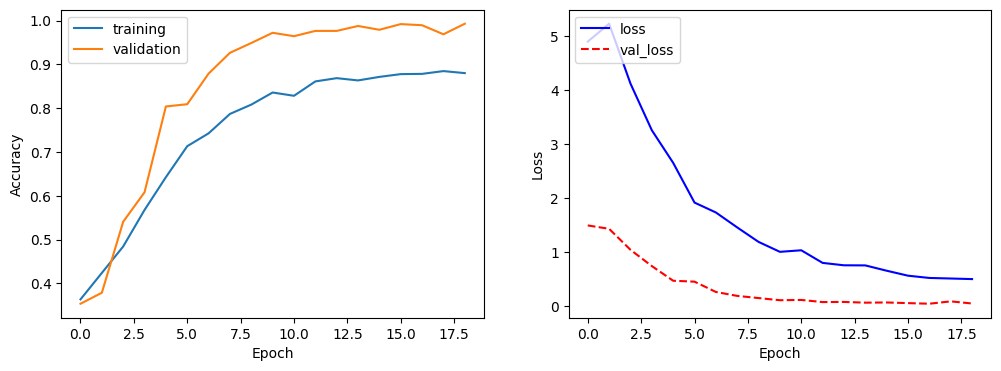

In [40]:
# 시각화 - 정확도 비교 / loss값 비교 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc = 'upper left')

plt.show()

- 데이터 augmentation을 진행해서 동일한 모델 학습을 해봐야겠다

---
### CNN Model 3 with data augmentation
- train modified model after data augmentation
[참고] tensorflow keras의 ImageDataGenerator
- 작동 컨셉
    1. ImageDataGenerator 객체에 옵션 정의
    2. 내장된 flow() 함수에 데이터셋을 넣음
    3. 이 객체를 keras.Model.fit() 함수에 흘려주면 데이터가 Augmentation되며 모델에 사용된다
   
- [참고 텐서플로우 공식 문서페이지](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#used-in-the-notebooks)
- [참고 블로그](https://blog.naver.com/PostView.naver?blogId=siniphia&logNo=222118275636&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView)

In [52]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)  # 20도 회전 및 좌우반전
datagen.fit(x_train)

In [56]:
# modified_deep_model
'''
가중치 초기화 : he initializer

convolution layer : 2개
    - filter 3x3 16개
    - filger 3x3 16개

활성화함수 전마다 batch normalization 실행

activation function : relu

maxpooling : 2개
    - filter 2x2

dropout : 0.3 비율 

final activation function : softmax
optimizer : adam
    - learning rate : 0.001

    
loss function : sparse categorical crossentropy
'''
def modified_deep_cnn():
    model = Sequential()
    # use weight initializer : 'He initializer'
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', 
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                     kernel_initializer='he_normal'))
    # add batch normalization
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same',  
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                     kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 16 neurons
    model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
    # dropout
    model.add(Dropout(rate=0.3))
    # final layer with 3 neurons to classify the instances
    model.add(Dense(3, activation='softmax'))

    adam = optimizers.legacy.Adam(learning_rate = 0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [59]:
# train without early_stop
model = modified_deep_cnn()
model.summary()

history = model.fit(datagen.flow(x_train, y_train, batch_size=10), 
                                 validation_data=datagen.flow(x_val, y_val, batch_size=8), epochs=20, verbose=2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 56, 56, 16)        448       
                                                                 
 batch_normalization_4 (Bat  (None, 56, 56, 16)        64        
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 28, 28, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 16)       

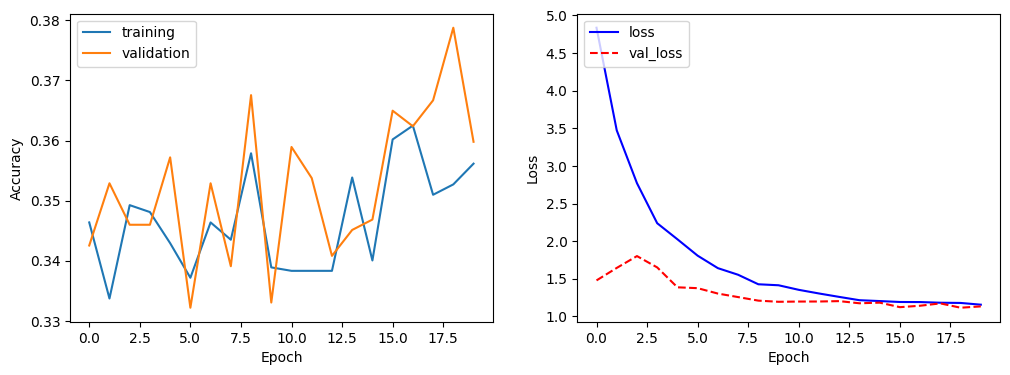

In [60]:
# 시각화 - 정확도 비교 / loss값 비교 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc = 'upper left')

plt.show()

- 선이 엄청 튀는 그래프가 나온다. 과적합은 막은것 같지만, 학습이 거의 이루어지지 않고 있다.
  - 피처수를 추가한 모델로 다시 훈련해본다.

### CNN Model 4 - deep_cnn2 

In [61]:
# modified_deep_model 2
'''
가중치 초기화 : he initializer

convolution layer : 2개
    - filter 3x3 16개
    - filger 3x3 16개

활성화함수 전마다 batch normalization 실행

activation function : relu

maxpooling : 2개
    - filter 2x2

dropout : 0.3 비율 

final activation function : softmax
optimizer : adam
    - learning rate : 0.001

    
loss function : sparse categorical crossentropy
'''
def deep_cnn2():
    model = Sequential()
    # use weight initializer : 'He initializer'
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', 
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                     kernel_initializer='he_normal'))
    # add batch normalization
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',  
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                     kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',  
                 input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                 kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 64 neurons
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    # dropout
    model.add(Dropout(rate=0.3))
    # final layer with 3 neurons to classify the instances
    model.add(Dense(3, activation='softmax'))

    adam = optimizers.legacy.Adam(learning_rate = 0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [62]:
model = deep_cnn2()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 56, 56, 16)        448       
                                                                 
 batch_normalization_6 (Bat  (None, 56, 56, 16)        64        
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 28, 28, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_7 (Bat  (None, 28, 28, 32)       

In [63]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=10), 
                                 validation_data=datagen.flow(x_val, y_val, batch_size=8), epochs=20, verbose=2)

Epoch 1/20
174/174 - 4s - loss: 4.3528 - accuracy: 0.3412 - val_loss: 1.5847 - val_accuracy: 0.3192 - 4s/epoch - 21ms/step
Epoch 2/20
174/174 - 2s - loss: 2.1077 - accuracy: 0.4517 - val_loss: 1.6056 - val_accuracy: 0.4443 - 2s/epoch - 11ms/step
Epoch 3/20
174/174 - 2s - loss: 1.3690 - accuracy: 0.5046 - val_loss: 1.9735 - val_accuracy: 0.4323 - 2s/epoch - 11ms/step
Epoch 4/20
174/174 - 2s - loss: 1.1787 - accuracy: 0.5564 - val_loss: 1.3809 - val_accuracy: 0.5410 - 2s/epoch - 12ms/step
Epoch 5/20
174/174 - 2s - loss: 1.1403 - accuracy: 0.5621 - val_loss: 1.3754 - val_accuracy: 0.5306 - 2s/epoch - 11ms/step
Epoch 6/20
174/174 - 2s - loss: 1.0587 - accuracy: 0.5926 - val_loss: 1.0102 - val_accuracy: 0.5764 - 2s/epoch - 11ms/step
Epoch 7/20
174/174 - 2s - loss: 0.9994 - accuracy: 0.6053 - val_loss: 0.8072 - val_accuracy: 0.6618 - 2s/epoch - 11ms/step
Epoch 8/20
174/174 - 2s - loss: 0.9218 - accuracy: 0.6461 - val_loss: 0.8391 - val_accuracy: 0.6868 - 2s/epoch - 11ms/step
Epoch 9/20
174/1

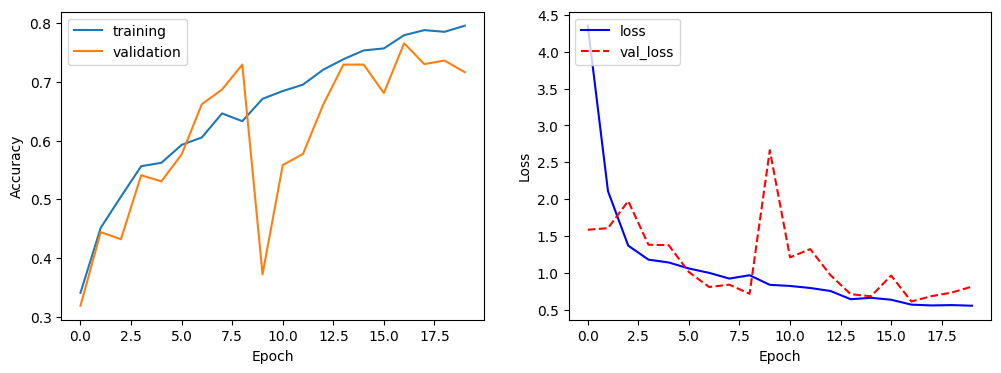

In [64]:
# 시각화 - 정확도 비교 / loss값 비교 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc = 'upper left')

plt.show()

- validation 데이터셋에 뭔가 문제가 있는 데이터가 있을지도 모르겠다. epoch 9 지점에서 정확도가 굉장히 떨어진다.
- modified_deep_cnn 모델보다는 확실히 학습이 되었지만 만족스러운 정확도는 나오지 않고 있다.
- 문제가 되는 데이터들을 다시 확인해보고 모델을 추가 수정한다.

---
## 추론한 확률 분포 확인
- model.predict() 입력값을 보고 실제로 추론한 확률 분포 확인

In [65]:
predicted_result = model.predict(x_val)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_val를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_val[idx])

37/37 [==============================] - 0s 4ms/step
model.predict() 결과 :  [0.62543815 0.20558046 0.1689815 ]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [7.5094181e-01 4.0935885e-13 2.4905819e-01]
라벨: 2, 예측결과: 0


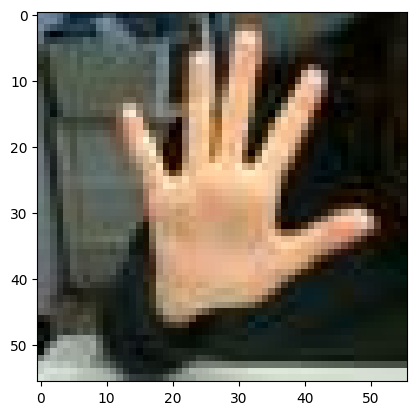

예측확률분포: [0.4026931  0.10048549 0.49682143]
라벨: 1, 예측결과: 2


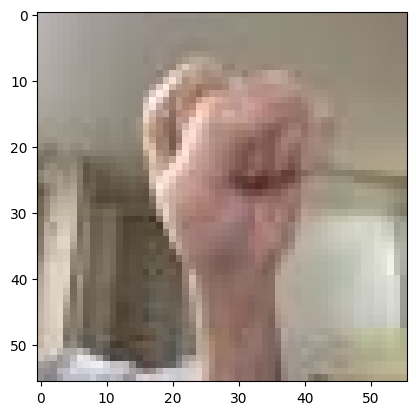

예측확률분포: [0.3532453  0.01361339 0.6331414 ]
라벨: 0, 예측결과: 2


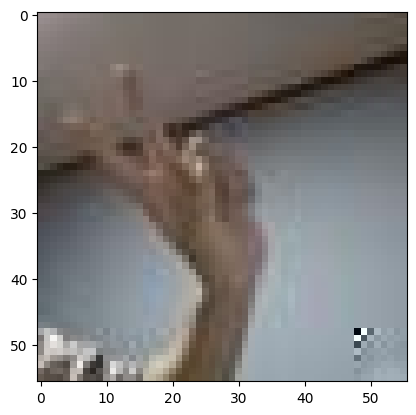

예측확률분포: [0.8950116  0.06527673 0.03971177]
라벨: 1, 예측결과: 0


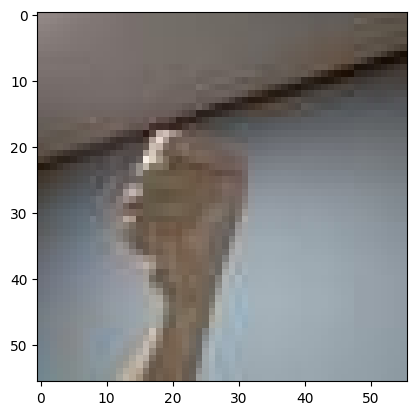

예측확률분포: [0.7498365  0.21632516 0.03383842]
라벨: 1, 예측결과: 0


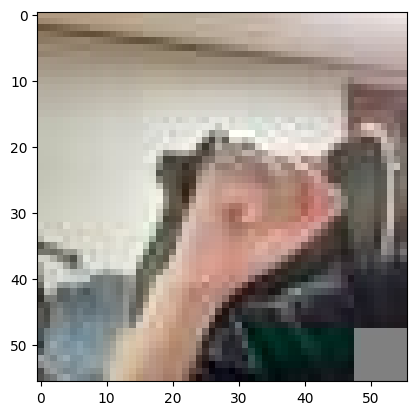

In [66]:
# 정답과 다른 예측을 하는 경우 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_val[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_val[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_val[n], cmap=plt.cm.binary)
    plt.show()

- 멀쩡한 데이터들인데 전혀 학습을 하지 못한걸 알수있다.
- 좀더 촘촘한 학습 모델을 만들어봐야겠다.

--- 
### CNN Model 5 - deep_cnn3
- 마지막 모델

In [67]:
# modified_deep_model 2
'''
가중치 초기화 : he initializer

convolution layer : 5개
    - filter 3x3 16개
    - filter 3x3 32개
    - filter 3x3 32개
    - filter 3x3 64개
    - filter 3x3 64개
    
활성화함수 전마다 batch normalization 실행

activation function : relu

maxpooling layer : 5개
    - filter 2x2

dropout : 0.5 비율 

final activation function : softmax
optimizer : adam
    - learning rate : 0.001

    
loss function : sparse categorical crossentropy
'''
def deep_cnn3():
    model = Sequential()
    # use weight initializer : 'He initializer'
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', 
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                     kernel_initializer='he_normal'))
    # add batch normalization
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',  
                     input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                     kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',  
                 input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                 kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',  
                 input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                 kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',  
                 input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]),
                 kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 64 neurons
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    # dropout
    model.add(Dropout(rate=0.5))
    # final layer with 3 neurons to classify the instances
    model.add(Dense(3, activation='softmax'))

    adam = optimizers.legacy.Adam(learning_rate = 0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [68]:
model = deep_cnn3()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 56, 56, 16)        448       
                                                                 
 batch_normalization_9 (Bat  (None, 56, 56, 16)        64        
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 56, 56, 16)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 28, 28, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_10 (Ba  (None, 28, 28, 32)       

In [69]:
# train with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=10), 
                                 validation_data=datagen.flow(x_val, y_val, batch_size=8), epochs=20, verbose=2)

Epoch 1/20
174/174 - 5s - loss: 1.5586 - accuracy: 0.4028 - val_loss: 1.3237 - val_accuracy: 0.3684 - 5s/epoch - 28ms/step
Epoch 2/20
174/174 - 2s - loss: 1.0558 - accuracy: 0.5449 - val_loss: 0.9031 - val_accuracy: 0.5677 - 2s/epoch - 13ms/step
Epoch 3/20
174/174 - 2s - loss: 1.0017 - accuracy: 0.5771 - val_loss: 0.8113 - val_accuracy: 0.6316 - 2s/epoch - 12ms/step
Epoch 4/20
174/174 - 2s - loss: 0.8627 - accuracy: 0.6352 - val_loss: 0.7523 - val_accuracy: 0.6946 - 2s/epoch - 12ms/step
Epoch 5/20
174/174 - 2s - loss: 0.7413 - accuracy: 0.6858 - val_loss: 0.8055 - val_accuracy: 0.6307 - 2s/epoch - 12ms/step
Epoch 6/20
174/174 - 2s - loss: 0.6462 - accuracy: 0.7319 - val_loss: 0.5984 - val_accuracy: 0.7541 - 2s/epoch - 12ms/step
Epoch 7/20
174/174 - 2s - loss: 0.5722 - accuracy: 0.7716 - val_loss: 0.5187 - val_accuracy: 0.7584 - 2s/epoch - 12ms/step
Epoch 8/20
174/174 - 2s - loss: 0.5101 - accuracy: 0.8130 - val_loss: 0.5508 - val_accuracy: 0.7722 - 2s/epoch - 12ms/step
Epoch 9/20
174/1

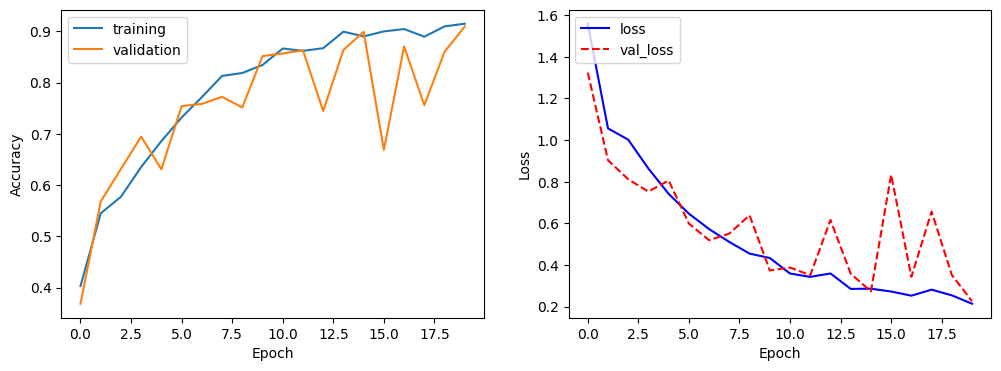

In [70]:
# 시각화 - 정확도 비교 / loss값 비교 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc = 'upper left')

plt.show()

- 여전히 validation data의 정확도나 손실값이 튀는 모양을 띄지만 전보다는 확실히 좋아졌다.
- test data로 마지막 검증을 해본다.

---
## Test accuracy 확인 2

In [71]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

39/39 - 0s - loss: 0.1733 - accuracy: 0.9404 - 372ms/epoch - 10ms/step
test_loss: 0.17330314218997955 
test_accuracy: 0.9404186606407166


- 94% 정확도가 나왔지만 사실 이게 좋은 결과값인지 확신이 서지 않는다.
- 결과값을 읽는 연습이 더 필요하다.

---
# 회고
[KEEP]
- 금요일과는 다르게 차분한 마음으로 데이터를 준비하고, 모델을 디자인했다.
- data augmentation과 과적합을 막는 여러 옵션을 사용해서 결과값에 대해 해석한 내용을 보완하려고했다.
     
[PROBLEM]
- 그래프가 의미하는 바를 해석하는게 어렵다. 책에서는 그래프 결과값으로 상황을 정의하고 해결했던게 아니라 이론적으로 주어진 상황에 대한 해결방법을 공부했더니 실제로 그래프가 무엇을 뜻하는지 읽어내는게 어려웠다.
   
   
[TRY]
- 그래프 결과를 해석하는 연습이 필요하다.
- 이론을 실제로 적용해보는 태도를 갖춰야겠다.